# Learning and Decision Making

## Laboratory 4: Supervised learning

In the end of the lab, you should export the notebook to a Python script (File >> Download as >> Python (.py)). Your file should be named `padi-lab4-groupXX.py`, where the `XX` corresponds to your group number and should be submitted to the e-mail <adi.tecnico@gmail.com>. 

Make sure...

* **... that the subject is of the form `[<group n.>] LAB <lab n.>`.** 

* **... to strictly respect the specifications in each activity, in terms of the intended inputs, outputs and naming conventions.** 

In particular, after completing the activities you should be able to replicate the examples provided (although this, in itself, is no guarantee that the activities are correctly completed).

### 1. The IRIS dataset

The Iris flower data set is a data set describing the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa_, _Iris virginica and _Iris versicolor_). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

In your work, you will use the Iris dataset, considering only two of the three species of Iris.

---

We start by loading the dataset. The Iris dataset is available directly as part of `scikit-learn`and we use the `scikit-learn` command `load_iris` to retrieve the data. For example, you can run the code

```python
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets as data

# Load dataset
iris = data.load_iris()

data_X = iris.data[50:,:]          # Select only 2 classes
data_A = 2 * iris.target[50:] - 3  # Set output to {-1, +1}

# Get dimensions 
nE = data_X.shape[0]
nF = data_X.shape[1]

print('Number of examples:', nE)
print('Number of features per example:', nE)
```

to get the output

```
Number of examples: 100
Number of features per example: 4
```

In the code above, the dataset contains a total of `nE` examples (100); each example is described by `nF` features (4). The input data is stored in the numpy array `data_X`, while the output data is stored in `data_A`. 

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn import datasets as data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [17]:

# Load dataset
iris = data.load_iris()

data_X = iris.data[50:,:]          # Select only 2 classes
data_A = 2 * iris.target[50:] - 3  # Set output to {-1, +1}

# Get dimensions 
nE = data_X.shape[0]
nF = data_X.shape[1]

print('Number of examples:', nE)
print('Number of features per example:', nF)

Number of examples: 100
Number of features per example: 4


---

#### Activity 1.        

Write a function named `preprocess` that takes as input two numpy arrays, `input_data` and `output_data`, with shapes, respectively, `(nE, nF)` and `(nE,)`. Your function should:

* Split the data into a "train set" and a "test set". The test set should correspond to 10% of the whole data. To this purpose, you can use the function `train_test_split` from the module `model_selection` of `scikit-learn`. For reproducibility, set `random_state` to some fixed value (e.g., 30).
* Standardize the training data to have 0-mean and unitary standard deviation. You may find useful the `StandardScaler` from `sklearn.preprocessing`. You should also standardize the test data, but using the scaler fit to the training data.

The function should return, as output, a tuple of 5 elements, where

* The first element is a numpy array containing the (standardized) input data for the training set;
* The second element is a numpy array containing the output data for the training set;
* The third element is a numpy array containing the (standardizes) input data for the test set;
* The fourth element is a numpy array containing the output data for the test set;
* The fifth element is the scaler model.

Note that your function should work for *any* binary classification dataset, where `output_data` contains only the labels `-1` and `1`.

**Note**: Don't forget to import `numpy`.

---

In [18]:
RNDSEED = 30

In [19]:
# Add your code here.
#(nE,nF), (nE,)
def preprocess(inputData,outputData):
    #TODO split trainset an testset (10percent)
    nE = len(inputData)
    trainData,testData,trainOutput,testOutput = train_test_split(inputData, outputData, test_size=0.1, random_state=RNDSEED)
    # TODO confirm que este output
    scaler = StandardScaler()
    scaler.fit(trainData)
    trainData = scaler.transform(trainData)
    testData = scaler.transform(testData)

    return (trainData, trainOutput, testData, testOutput, scaler)


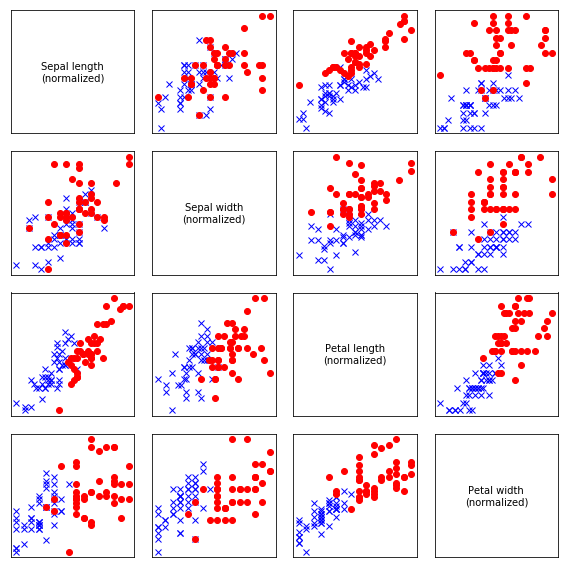

In [32]:
#Sanity Check
# Load dataset
iris = data.load_iris()

features = 'Sepal length\n(normalized)', 'Sepal width\n(normalized)', 'Petal length\n(normalized)', 'Petal width\n(normalized)'

data_X = iris.data[50:,:]
data_A = 2 * iris.target[50:] - 3

train_x, train_a, test_x, test_a, _ = preprocess(data_X, data_A)

# Plot data
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

idx1 = np.where(train_a == -1)[0]
idx2 = np.where(train_a == 1)[0]

for ax in axes.flat:
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

# Plot the data
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    for x, y in [(i,j), (j,i)]:
        axes[x,y].plot(train_x[idx1, x], train_x[idx1, y], 'bx', label='Versicolor')
        axes[x,y].plot(train_x[idx2, x], train_x[idx2, y], 'ro', label='Virginica')

# Label the diagonal subplots
for i in range(4):
    axes[i, i].annotate(features[i], (0.5, 0.5), xycoords='axes fraction', ha='center', va='center')

plt.tight_layout()

As an example, you can execute the code

```Python
# Load dataset
iris = data.load_iris()

features = 'Sepal length\n(normalized)', 'Sepal width\n(normalized)', 'Petal length\n(normalized)', 'Petal width\n(normalized)'

data_X = iris.data[50:,:]
data_A = 2 * iris.target[50:] - 3

train_x, train_a, test_x, test_a, _ = preprocess(data_X, data_A)

# Plot data
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

idx1 = np.where(train_a == -1)[0]
idx2 = np.where(train_a == 1)[0]

for ax in axes.flat:
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

# Plot the data
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    for x, y in [(i,j), (j,i)]:
        axes[x,y].plot(train_x[idx1, x], train_x[idx1, y], 'bx', label='Versicolor')
        axes[x,y].plot(train_x[idx2, x], train_x[idx2, y], 'ro', label='Virginica')

# Label the diagonal subplots
for i in range(4):
    axes[i, i].annotate(features[i], (0.5, 0.5), xycoords='axes fraction', ha='center', va='center')

plt.tight_layout()
```

To get as output the plot:

<img src="feature-matrix.png" align="left">

In the example above, the samples are represented by four features that have been normalized to have zero mean and unit standard deviation. However, as can be seen in the plots above, the training examples do not cover the full feature space. In fact, the plots suggest a strong correlation between some of the features, meaning that there may be some redundance in the four features, and a more compact representation may be possible. 

As such, in the next activity, you will perform an additional pre-processing step to reduce the dimensionality of the data from four to two dimensions, while maintaining most of the information. Specifically, you will transform your data so that each sample is now represented by two artificial features that capture most of the variability in the data, using a technique called [_principal component analysis_]( https://en.wikipedia.org/wiki/Principal_component_analysis).

---

#### Activity 2.

Write a function called `get_components` that receives, as input, standardized input data and performs principal component analysis on this data. Your function takes as input two numpy arrays, `train_x` and `test_x`, corresponding to the standardized training and test data obtained from the application of the function `preprocess` from **Activity 1** to a binary classification dataset, and an integer `n_comp`. Your function should

* Apply PCA to the training data (in `train_x`) to obtain a representation of the data with only `n_comp` features. You may find useful the function `PCA` from `sklearn.decomposition`. You should also apply PCA decomposition to the test data (in `test_x`), but using the analyzer fit to the training data.

The function should return, as output, a tuple of 3 elements, where

* The first element is a numpy array containing the transformed training set;
* The second element is a numpy array containing the transformed test set;
* The third element is the analyzer model.

Note that your function should work for *any* binary classification dataset.  

---

In [33]:
def get_components(train_x, test_x, n_comp):
    pca = PCA(n_comp)
    
    pca.fit(train_x)
    train = pca.transform(train_x)
    test = pca.transform(test_x)

    return (train, test, pca)

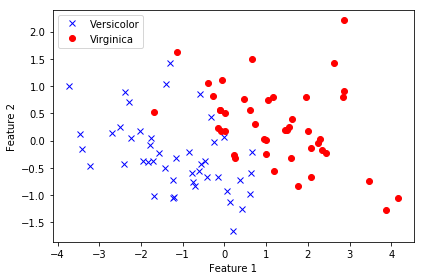

In [34]:
#Sanity Check
pca_train_x, pca_test_x, pca = get_components(train_x, test_x, 2)

# Plot data
plt.figure()

plt.plot(pca_train_x[idx1, 0], pca_train_x[idx1, 1], 'bx', label='Versicolor')
plt.plot(pca_train_x[idx2, 0], pca_train_x[idx2, 1], 'ro', label='Virginica')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')

plt.tight_layout()

As an example, you can run the following code on the data from the previous example.

```python
pca_train_x, pca_test_x, pca = get_components(train_x, test_x, 2)

# Plot data
plt.figure()

plt.plot(pca_train_x[idx1, 0], pca_train_x[idx1, 1], 'bx', label='Versicolor')
plt.plot(pca_train_x[idx2, 0], pca_train_x[idx2, 1], 'ro', label='Virginica')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')

plt.tight_layout()
```

Output:

<img src="pca.png" align="left">

As you may observe, the data now covers the feature space much more evenly, and the correlation between features is much less evident. In the continuation, you will use the gradient derivations from the homework to train a simple logistic regression model to classify the two types of flowers, "Versicolor" and "Virginica".

---

#### Activity 3.

Write a function named `my_train_lr` that trains a logistic regression classifier in Python using Newton-Raphson's method. The method is described by the update:

$$\mathbf{w}^{(k+1)}\leftarrow\mathbf{w}^{(k)}-\mathbf{H}^{-1}\mathbf{g},$$

where $\mathbf{H}$ and $\mathbf{g}$ are the _Hessian matrix_ and _gradient vector_ that you computed in your homework. To train the classifier, initialize the parameter vector, $\mathbf{w}$, to zeros; then, run a cycle that repeatedly updates the parameter vector according to the rule above until the difference between two iterations is sufficiently small (e.g., smaller than $10^{-5}$).

Your function should receive, as input, two numpy arrays:

* A numpy array `train_x`, corresponding to the input training data, after being standardized and principal components have been extracted. Your array should have a shape `(nE, nF)`, where `nE` is the number of examples in the training set, and `nF` is the number of features after PCA.
* A numpy array `train_a`, corresponding to the output training data, i.e., the labels corresponding to the examples in `train_x`. The array should have a shape `(nE,)` and all its elements should be either `1` or `-1`.

Make sure to add to your input an additional feature corresponding to the bias term, i.e., an all-ones feature. 

Your function should return a numpy array `w` of shape `(nF + 1, 1)` corresponding to the learned logistic regression parameters. Parameters `w[0:nF, 0]` should correspond to the weights of the features, while `w[nF]` should correspond to the bias term.

Your function should work for *any* binary classification dataset.  

**Note:** You may find useful to define a function `lr` that takes as inputs a sample `x`, an action `a` and a parameter vector `w` and computes

$$\mathtt{lr}(\mathbf{x},a,\mathbf{w})=\frac{1}{1+\exp(-a~\mathbf{w}^\top\mathbf{x})}.$$

---

In [23]:
#not tested
def lr(x, a, w):
    exponent = -a * np.transpose(w).dot(x)
    return 1 / (1 + math.exp(exponent))

In [24]:
def my_train_lr(train_x, train_a):
    nE = train_x.shape[0]
    nF = train_x.shape[1]
    err = 1

    def get_gradient():#is this right who knows
        gradient = np.zeros((nF + 1, 1))
        for i in range(nE):
            a = train_a[i]
            x = train_bias[i].reshape(-1, 1)
            gradient = np.add(gradient, a * x * (lr(x, a, w) - 1))
        return gradient * 1/nE

    def get_hessian():
        hessian = np.zeros((nF + 1, nF + 1))
        for i in range(nE):
            a = train_a[i]
            x = train_bias[i].reshape(-1, 1)
            hessian = np.add(hessian, x * x.reshape(1, -1) * lr(x, a, w) * (1 - lr(x, a, w)))
        return hessian * 1/nE

    #Your function should return a numpy array w of shape (nF + 1, 1)
    w = np.zeros((nF + 1, 1))

    #Make sure to add to your input an additional feature corresponding to the bias term, i.e., an all-ones feature.
    train_bias = np.zeros((nE, nF + 1))
    for line in range(train_x.shape[0]):
        train_bias[line] = np.append(train_x[line], [1])

    while(err > 1e-5):
        w_new = w - np.linalg.inv(get_hessian()).dot(get_gradient())
        err = np.linalg.norm(w_new - w)
        w = w_new

    return w

Learned vector of parameters:
[[ 3.14501957]
 [ 3.39615668]
 [-0.13782688]]


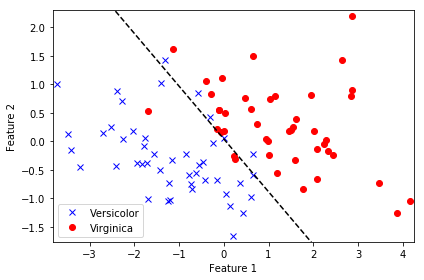

In [25]:
#Sanity Check
# Train model
w = my_train_lr(pca_train_x, train_a)

# Print learned parameters
print('Learned vector of parameters:')
print(w)

idx1 = np.where(train_a == -1)[0]
idx2 = np.where(train_a == 1)[0]

plt.figure()

plt.plot(pca_train_x[idx1, 0], pca_train_x[idx1, 1], 'bx', label='Versicolor')
plt.plot(pca_train_x[idx2, 0], pca_train_x[idx2, 1], 'ro', label='Virginica')

# Plot decision boundary
x_ax = np.arange(pca_train_x[:, 0].min(), pca_train_x[:, 0].max(), .01)
a_ax = - (w[0, 0] * x_ax + w[2, 0]) / w[1, 0]
plt.plot(x_ax, a_ax, 'k--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis([pca_train_x[:, 0].min() - 0.1, 
          pca_train_x[:, 0].max() + 0.1, 
          pca_train_x[:, 1].min() - 0.1, 
          pca_train_x[:, 1].max() + 0.1])

plt.legend(loc='best')

plt.tight_layout()

As an example, you can run the following code to plot the decision boundary learned by your function.

```python
# Train model
w = my_train_lr(pca_train_x, train_a)

# Print learned parameters
print('Learned vector of parameters:')
print(w)

idx1 = np.where(train_a == -1)[0]
idx2 = np.where(train_a == 1)[0]

plt.figure()

plt.plot(pca_train_x[idx1, 0], pca_train_x[idx1, 1], 'bx', label='Versicolor')
plt.plot(pca_train_x[idx2, 0], pca_train_x[idx2, 1], 'ro', label='Virginica')

# Plot decision boundary
x_ax = np.arange(pca_train_x[:, 0].min(), pca_train_x[:, 0].max(), .01)
a_ax = - (w[0, 0] * x_ax + w[2, 0]) / w[1, 0]
plt.plot(x_ax, a_ax, 'k--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis([pca_train_x[:, 0].min() - 0.1, 
          pca_train_x[:, 0].max() + 0.1, 
          pca_train_x[:, 1].min() - 0.1, 
          pca_train_x[:, 1].max() + 0.1])

plt.legend(loc='best')

plt.tight_layout()
```

As output, you should get something like:
````
Learned vector of parameters:
[[ 3.14501957]
 [ 3.39615668]
 [-0.13782688]]
```

<img src="lr.png" align="left">

As you can see, the classifier does a fairly good job in separating the two classes. 

You will now compare the classifier from **Activity 3** with a logistic regression classifier implemented in `sci-kit learn`.

---

#### Activity 4

Write a function `skl_train_lr` that trains a logistic regression classifier in Python using Newton-Raphson's method, but now using the implementation in `scikit-learn`. You can import the logistic regression model from `sklearn.linear_model` under the name `LogisticRegression`. 

Your function should receive, as input:

* A numpy array `train_x`, corresponding to the input training data, after being standardized and principal components have been extracted. Your array should have a shape `(nE, nF)`, where `nE` is the number of examples in the training set, and `nF` is the number of features after PCA.
* A numpy array `train_y`, corresponding to the output training data, i.e., the labels corresponding to the examples in `train_x`. The array should have a shape `(nE,)` and all its elements should be either `1` or `-1`.
* A numerical constant, `C`.

Fit the logistic regression model to the provided data using the `newton-cg` solver and a regularization coefficient `C`.

Your function should return a numpy array `w` of shape `(nF + 1, 1)` corresponding to the learned logistic regression parameters. Parameters `w[0:nF]` should correspond to the weights of the features, which you can access as the attribute `coef_` of the LR model, after training; `w[nF]` should correspond to the bias term, which you can access as the attribute `intercept_` of the LR model, after training. Your function should work for *any* binary classification dataset.  

Compare the parameter vector and decision boundary obtained with those from Activity 3 on the IRIS data.

---

In [26]:
# Add your code here.
def skl_train_lr(train_x, train_y, constC):
    clf = LogisticRegression(solver="newton-cg", C=constC)
    clf = clf.fit(train_x,train_y)
    #Your function should return a numpy array w of shape (nF + 1, 1)
    w = clf.coef_ 
    w = np.append(w, clf.intercept_)
    return w.reshape(len(w),1)

Learned vector of parameters (my_train_lr):
[[ 3.14501957]
 [ 3.39615668]
 [-0.13782688]]
Learned vector of parameters (skl_train_lr):
[[ 3.14501955]
 [ 3.39615666]
 [-0.13782687]]


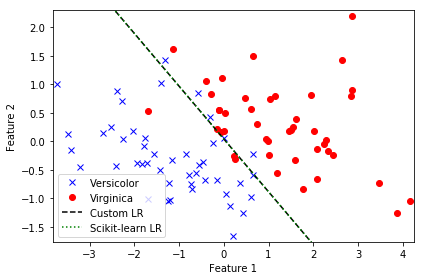

In [27]:
# Train model
walt = skl_train_lr(pca_train_x, train_a, 1e40)

# Print learned parameters
print('Learned vector of parameters (my_train_lr):')
print(w)

print('Learned vector of parameters (skl_train_lr):')
print(walt)

plt.figure()

plt.plot(pca_train_x[idx1, 0], pca_train_x[idx1, 1], 'bx', label='Versicolor')
plt.plot(pca_train_x[idx2, 0], pca_train_x[idx2, 1], 'ro', label='Virginica')

# Plot custom decision boundary
x_ax = np.arange(pca_train_x[:, 0].min(), pca_train_x[:, 0].max(), .01)
a_ax = - (w[0, 0] * x_ax + w[2, 0]) / w[1, 0]
plt.plot(x_ax, a_ax, 'k--', label='Custom LR')

# Plot Scikit-learn decision boundary
a_alt = - (walt[0, 0] * x_ax + walt[2, 0]) / walt[1, 0]
plt.plot(x_ax, a_alt, 'g:', label='Scikit-learn LR')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis([pca_train_x[:, 0].min() - 0.1, 
          pca_train_x[:, 0].max() + 0.1, 
          pca_train_x[:, 1].min() - 0.1, 
          pca_train_x[:, 1].max() + 0.1])

plt.legend(loc='best')

plt.tight_layout()

<span style="color:blue"> _Add your comments here._ </span> 

In [29]:
#TODO anything else?
print("The margin of error is minimal. As seen below:")
for wI in range(len(walt)):
    if(wI != len(walt)-1):
        print("\tWeight " + str(wI+1) + " difference = " + str(abs(walt[wI]-w[wI])))
    else:
        print("\tBias difference = " + str(abs(walt[wI]-w[wI])))
        

The margin of error is minimal. As seen below:
	Weight 1 difference = [  1.94799745e-08]
	Weight 2 difference = [  1.91433775e-08]
	Bias difference = [  3.80659290e-09]


As an example, you can run the following code to plot the two decision boundaries, from **Activity 3** and **Activity 4**.


As output, you should get something like:
```
Learned vector of parameters (my_train_lr):
[[ 3.14501957]
 [ 3.39615668]
 [-0.13782688]]
Learned vector of parameters (skl_train_lr):
[[ 3.14501955]
 [ 3.39615666]
 [-0.13782687]]
```

<img src="comparison.png" align="left">

Although the learned classifiers seem to provide a reasonable classification of the two species of Iris flowers, we are only looking at the training data, so it is possible that the classifiers may actually be overfitting (i.e., they perform rather well on the training data, but would not perform so well in "real world" data). 

In the next activities, you will investigate whether overfitting occurs, by observing how the performance changes when limiting the representation power of the classifier. To do so, you will impose soft restrictions on the parameters that the classifier is allowed to use. You will then observe how the performance changes as you tighten those restrictions. To conduct such study, you first need to compute the performance of your LR classifier.

---

#### Activity 5

Write a function `nll` that computes the *negative log likelihood* of an LR classifier for a given dataset. Your function should receive, as input,

* A numpy array `x`, corresponding to the inputs where the classifier will be evaluated. The array should have a shape `(nE, nF)`, where `nE` is the number of examples in the set, and `nF` is the number of input features describing each example (bias feature not included).

* A numpy array `y`, corresponding to the respective outputs. The array should have a shape `(nE,)` and all its elements should be either `1` or `-1`.

* A numpy array `w`, such as those computed in **Activity 3** and **Activity 4**. The array should have a shape `(nF + 1, 1)` and corresponds to the parameters of your LR classifier.

Your function should return a numerical value corresponding to the average negative log likelihood of the data according to the classifier with parameters `w`. Recall that the average negative log likelihood of the data is given by

$$\hat{L}_N(\mathbf{w})=-\frac{1}{N}\sum_{n=1}^N\log\pi_{\mathbf{w}}(a_n\mid x_n)$$,

where $\pi_{\mathbf{w}}(a\mid x)$ is the probability of $a\in\{-1,1\}$ given input $x$.

**Note:** You main find useful the function `lr` suggested in **Activity 3**.

**Note:** You may find useful to define a function `lr` that takes as inputs a sample `x`, an action `a` and a parameter vector `w` and computes

$$\mathtt{lr}(\mathbf{x},a,\mathbf{w})=\frac{1}{1+\exp(-a~\mathbf{w}^\top\mathbf{x})}.$$
---

In [30]:
# Add your code here.
def nll(x, y, w):
    nE = x.shape[0]
    nF = x.shape[1]

    x_bias = np.zeros((nE, nF + 1))
    for line in range(x.shape[0]):
        x_bias[line] = np.append(x[line], [1])

    negLog = 0
    for i in range(nE):
        a = y[i]
        xAux = x_bias[i]
        negLog += np.log(lr(xAux, a, w))
    return (-1/nE) * negLog

Completed: 100%


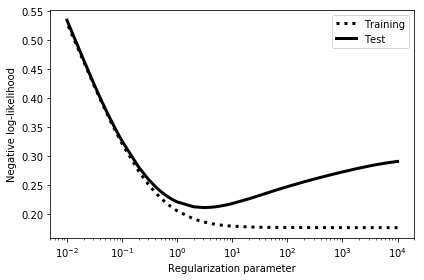

In [31]:
COEFFS = [1e4,  9e3, 8e3, 7e3, 6e3, 5e3, 4e3, 3e3, 2e3,
          1000, 900, 800, 700, 600, 500, 400, 300, 200, 
          100,  90,  80,  70,  60,  50,  40,  30,  20, 
          10,   9,   8,   7,   6,   5,   4,   3,   2, 
          1,    .9,  .8,  .7,  .6,  .5,  .4,  .3,  .2,  
          .1,   .09, .08, .07, .06, .05, .04, .03, .02, .01]

RUNS = 100

# Investigate overfitting
err_train = np.zeros((len(COEFFS), 1)) # Error in training set
err_valid = np.zeros((len(COEFFS), 1)) # Error in validation set

np.random.seed(45)

print('Completed: ', end='\r')

for run in range(RUNS):
    
    # Split training data in "train" and "validation"
    x_train, x_valid, a_train, a_valid = train_test_split(pca_train_x, train_a, test_size=0.15)
    
    for n in range(len(COEFFS)):
        
        # Print progress
        print('Completed: %i %%' % int((run * len(COEFFS) + n) / (RUNS * len(COEFFS)) * 100), end='\r')

        # Train classifier
        w = skl_train_lr(x_train, a_train, COEFFS[n])

        # Compute train and test loss
        nll_train = nll(x_train, a_train, w)
        nll_valid = nll(x_valid, a_valid, w)

        err_train[n] += nll_train / RUNS
        err_valid[n] += nll_valid / RUNS
        
print('Completed: 100%')

plt.figure()
plt.semilogx(COEFFS, err_train, 'k:', linewidth=3, label='Training')
plt.semilogx(COEFFS, err_valid, 'k-', linewidth=3, label='Test')
plt.xlabel('Regularization parameter')
plt.ylabel('Negative log-likelihood')
plt.legend(loc = 'best')

plt.tight_layout()

You can now use your function to run the following interaction.

```python

```

and observe the following output:

```
Completed: 100%
```

<img src="overfitting.png" align="left">

---

#### Activity 6.

Looking at the results in the example from **Activity 5**, indicate whether you observe overfitting or not, and explain your conclusion. Based on this conclusion, select a value for the parameter `C` that you find is more adequate for the Iris data, and explain your selection. Then, for your selected value of `C`,

* Train a logistic regression model using the whole training data, using the function from **Activity 4**.
* Compute the negative log likelihood of the resulting classifier both in the training data and the test data.

Do the results match what you expected? Explain.

---

In [ ]:
# Add your code here.
w = skl_train_lr(pca_train_x, train_a,1)
nll_valid = nll(pca_test_x, test_a, w)



Completed: 100%


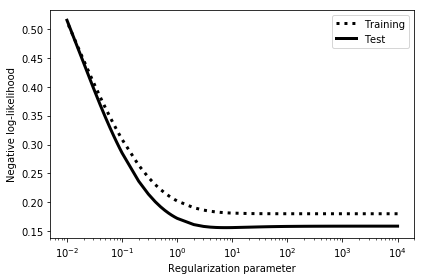

In [38]:
COEFFS = [1e4,  9e3, 8e3, 7e3, 6e3, 5e3, 4e3, 3e3, 2e3,
          1000, 900, 800, 700, 600, 500, 400, 300, 200, 
          100,  90,  80,  70,  60,  50,  40,  30,  20, 
          10,   9,   8,   7,   6,   5,   4,   3,   2, 
          1,    .9,  .8,  .7,  .6,  .5,  .4,  .3,  .2,  
          .1,   .09, .08, .07, .06, .05, .04, .03, .02, .01]

RUNS = 100

# Investigate overfitting
err_train = np.zeros((len(COEFFS), 1)) # Error in training set
err_test = np.zeros((len(COEFFS), 1)) # Error in validation set

np.random.seed(45)

print('Completed: ', end='\r')

for run in range(RUNS):
    
    # Split training data in "train" and "validation"
    x_train, x_valid, a_train, a_valid = train_test_split(pca_train_x, train_a, test_size=0.15)
    
    for n in range(len(COEFFS)):
        
        # Print progress
        print('Completed: %i %%' % int((run * len(COEFFS) + n) / (RUNS * len(COEFFS)) * 100), end='\r')

        # Train classifier
        w = skl_train_lr(pca_train_x, train_a,COEFFS[n])

        # Compute train and test loss
        nll_train = nll(pca_train_x, train_a, w)
        nll_test = nll(pca_test_x, test_a, w)

        err_train[n] += nll_train / RUNS
        err_test[n] += nll_test / RUNS
        
print('Completed: 100%')

plt.figure()
plt.semilogx(COEFFS, err_train, 'k:', linewidth=3, label='Training')
plt.semilogx(COEFFS, err_test, 'k-', linewidth=3, label='Test')
plt.xlabel('Regularization parameter')
plt.ylabel('Negative log-likelihood')
plt.legend(loc = 'best')

plt.tight_layout()

#TODO wtf shouldn't this show overfit as well?!

<span style="color:blue"> _Add your comments here._ </span>

In [41]:
print("We can see overfitting from the a little before C = 1")
print("We pick a value under 1 for C, let's say C=.9")
w = skl_train_lr(pca_train_x, train_a, 0.9)

# Compute train and test loss
nll_train = nll(pca_train_x, train_a, w)
nll_test = nll(pca_test_x, test_a, w)
print("The negative loglikelyhood for the train set: " + str(nll_train))
print("The negative loglikelyhood for the test set: " + str(nll_test))

#TODO what why? check above graph as well, is this normal?

print("The results are even better than expected, the chosen C gets us low values for negative loglikelyhood in the training set.")
print("And given the results for the test set it does so without overfitting.")

We can see overfitting from the a little before C = 1
We pick a value under 1 for C, let's say C=.9
The negative loglikelyhood for the train set: 0.204704703045
The negative loglikelyhood for the test set: 0.174547278363
The results are even better than expected, the chosen C gets us low values for negative loglikelyhood in the training set.
And given the results for the test set it does so without overfitting.
